In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from os import listdir

In [2]:

def donut_to_image(background, donut, x, y):
    copy = background.copy()
    for x_d in range(donut.shape[0]):
        for y_d in range(donut.shape[1]):
            try:
                if (donut[x_d, y_d] != np.array([255,255,255])).any():
                    copy[x+x_d, y+y_d] = donut[x_d, y_d]
            except:
                pass
    return copy

In [3]:
def random_donut(n, back, donut):
    N = int(np.random.randint(low = 1, high = n, size = 1))
    copy_b = back.copy()

    sp = []

    for _ in range(N):
        x, y = np.random.randint(low = 16, high = 112, size = 2)
        width, height = np.random.randint(low = 16, high=32, size = 2)
        res_don = cv2.resize(donut, (width, width), cv2.INTER_NEAREST)
        copy_b = donut_to_image(copy_b, res_don, x, y)

        sp.append([x, y, x+width, y+width])
    
    return copy_b.tolist(), sp

In [4]:
def swap_xy(np_arr):
    x = (np_arr[3] + np_arr[1])//2
    y = (np_arr[2] + np_arr[0])//2
    w = (np_arr[3] - np_arr[1])
    h = (np_arr[2] - np_arr[0])
    return np.array([x, y, w, h])

t = lambda x: -np.log(1/x - 1)

In [5]:
N = 16
img_width = 512
img_height = 512
pw = 10
ph = 10
sp = []


def box(el):
    N = 16
    img_width = 128
    img_height = 128
    pw = 7
    ph = 7
    sp = []
    anchor_boxes = []
    for i in range(N):
        anchor_boxes.append([0] * N)
    for box in el:
        x, y, w, h = swap_xy(box)
        ind_x = int(x//(img_width/N))
        tx = t((x%(img_width/N))/(img_width/N)+0.001)
        ind_y = int(y//(img_height/N))
        ty = t((y%(img_height/N))/(img_height/N)+0.001)
        tw = np.log(w/pw)
        th = np.log(h/ph)
        anchor_boxes[ind_y][ind_x] = [tx, ty, tw, th, 1]
    
    for x in range(N):
        for y in range(N):
            if anchor_boxes[x][y] == 0:
                anchor_boxes[x][y] = [-6,-6,2,2,0]
    return anchor_boxes


In [6]:
path = 'D:/YOLOv3/data/images/background/'

donut = cv2.imread(r'D:\YOLOv3\data\images\donut.png')

X = []
Y = []

for ind, img in enumerate(listdir(path)):
    win = cv2.imread(path+img)
    win = cv2.resize(win, (128, 128), cv2.INTER_NEAREST)
    print(ind)
    for ind in range(50):
        data = random_donut(7, win, donut)
        X.append(data[0])
        Y.append(box(data[1]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
X.shape

(5000, 128, 128, 3)

In [10]:
Y.shape

(5000, 16, 16, 5)

In [42]:
np.save('D:/YOLOv3/data/X', X)
np.save('D:/YOLOv3/data/Y', Y)

[[362, 283, 422, 343], [56, 325, 123, 392], [73, 53, 215, 195]]


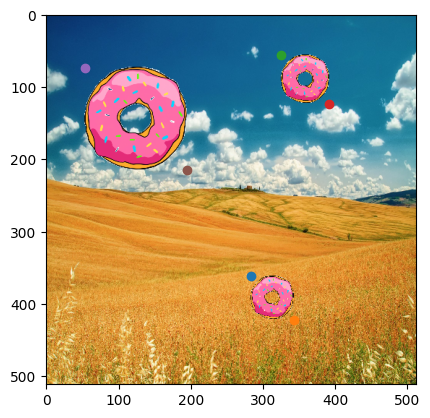

In [7]:
donut = cv2.imread(r'D:\YOLOv3\data\images\donut.png')
win = cv2.imread(r'D:\YOLOv3\data\images\background\pole.jpg')
win = cv2.resize(win, (512, 512), cv2.INTER_NEAREST)
w = random_donut(7, win, donut)
plt.imshow(w[0][:,:,::-1])
for el in w[1]:
    plt.scatter(el[1],el[0])
    plt.scatter(el[3],el[2])
print(w[1])